This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Advanced deep learning for computer vision

## Three essential computer vision tasks

## An image segmentation example

In [0]:
# !wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
# !wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
# !tar -xf images.tar.gz
# !tar -xf annotations.tar.gz

In [1]:
import os

input_dir = "/home/kent/college/data_sets/pets/images/"
target_dir = "/home/kent/college/data_sets/pets/annotations/trimaps/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])
target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])

2022-03-14 00:15:58.892625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-14 00:15:58.892684: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


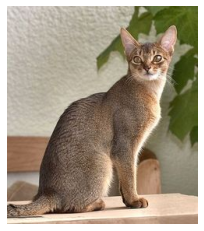

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(input_img_paths[34]))

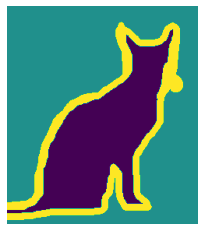

In [3]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])

img = img_to_array(load_img(target_paths[34], color_mode="grayscale"))
display_target(img)

In [4]:
import numpy as np
import random

img_size = (192, 192)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

2022-03-14 00:16:02.637671: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-14 00:16:02.637696: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kent-5040): /proc/driver/nvidia/version does not exist
2022-03-14 00:16:02.638724: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Image size analysis

In [5]:
train_input_imgs.shape

(6390, 192, 192, 3)

In [6]:
train_targets.shape

(6390, 192, 192, 1)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
float32
(500, 334, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


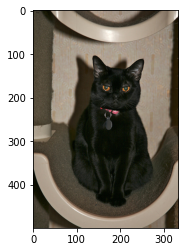

In [15]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
# load the image
img = load_img('/home/kent/college/data_sets/pets/images/Bombay_173.jpg')
print(type(img))
# convert to numpy array
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
# convert back to image
img_pil = array_to_img(img_array)
print(type(img))
plt.imshow(img)

In [41]:
img_array.shape

(500, 334, 3)

In [7]:
a = img_to_array(load_img('/home/kent/college/data_sets/pets/images/Bombay_173.jpg', target_size=(192,192)))
a_int8 = img_to_array(tf.convert_to_tensor(a, dtype=tf.int8))
a_float32 = img_to_array(tf.image.convert_image_dtype(a_int8, dtype=tf.float32, saturate=True))

In [8]:
a_int8.shape

(192, 192, 3)

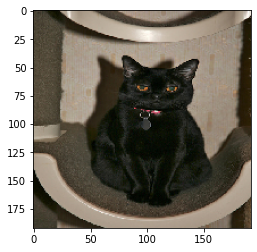

In [9]:
plt.imshow(a_float32.astype("uint8"))

In [15]:
from skimage.color import rgb2gray

grayscale = rgb2gray(a_int8)

In [16]:
grayscale[:5,:5]

array([[67.2598  , 66.4118  , 60.411804, 73.259796, 59.7627  ],
       [59.7781  , 67.2598  , 58.7627  , 78.4098  , 67.404   ],
       [66.762695, 61.4627  , 72.33389 , 70.136795, 41.3435  ],
       [66.3339  , 65.3435  , 71.1897  , 62.762695, 62.9848  ],
       [62.2676  , 72.831   , 62.2676  , 73.411804, 63.265594]],
      dtype=float32)

In [20]:
# create the histogram
histogram, bin_edges = np.histogram(grayscale, bins=256, range=(-255, 255))

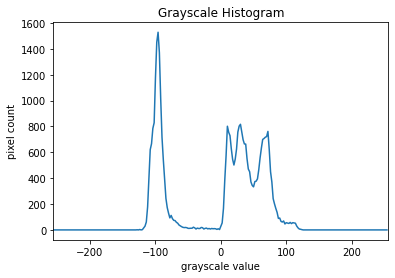

In [21]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([-255, 255.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

## Simple training pipeline

In [ ]:
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

In [ ]:
sm.set_framework('tf.keras')
sm.framework()

In [53]:
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

# load your data
x_train, y_train, x_val, y_val = train_input_imgs, train_targets, val_input_imgs, val_targets

In [54]:
# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

# define model
model = Unet(BACKBONE, encoder_weights='imagenet')
model.compile('Adam', loss=bce_jaccard_loss, metrics=[iou_score])

2022-03-13 14:52:17.326080: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-13 14:52:17.329033: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kent-5040): /proc/driver/nvidia/version does not exist
2022-03-13 14:52:17.336710: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [55]:
# fit model
model.fit(
    x=x_train,
    y=y_train,
    batch_size=16,
    epochs=10,
    validation_data=(x_val, y_val),
)

2022-03-13 14:52:22.386063: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706682880 exceeds 10% of free system memory.
2022-03-13 14:52:22.745836: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 235560960 exceeds 10% of free system memory.


Epoch 1/10


TypeError: in user code:

    File "/home/kent/venv_DL/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/home/kent/venv_DL/lib/python3.8/site-packages/segmentation_models/base/objects.py", line 114, in __call__  *
        return self.l1(gt, pr) + self.l2(gt, pr)
    File "/home/kent/venv_DL/lib/python3.8/site-packages/segmentation_models/losses.py", line 130, in __call__  *
        return F.binary_crossentropy(gt, pr, **self.submodules)
    File "/home/kent/venv_DL/lib/python3.8/site-packages/segmentation_models/base/functional.py", line 256, in binary_crossentropy  *
        return backend.mean(backend.binary_crossentropy(gt, pr))
    File "/home/kent/venv_DL/lib/python3.8/site-packages/keras/backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    TypeError: Input 'y' of 'Mul' Op has type uint8 that does not match type float32 of argument 'x'.
